In [1]:
from datetime import date
import pandas as pd
import matplotlib.dates as mdates
from pvoutput import PVOutput

In [2]:
# Set API key and System ID here, or in ~/.pvoutput.yml
API_KEY = None
SYSTEM_ID = None

pv = PVOutput(API_KEY, SYSTEM_ID)

In [3]:
# Search for PV systems with 5km of a point in the UK
pv_systems = pv.search(query='5km', lat=52.0668589, lon=-1.3484038)
pv_systems.head()

,system_name,system_size_watts,postcode,orientation,num_outputs,last_output,panel,inverter,distance_km,latitude,longitude
system_id,,,,,,,,,,,
68309,Thorn House,3960,United Kingdom OX16,SE,0,No Outputs,Evolution Ultra PLM-330MB-66,Growatt,1.0,52.06,-1.34
61190,Banbury OX16,5600,United Kingdom OX16,S,356,Today,SunPower,SolarEdge 5K HD,1.0,52.06,-1.34
7191,Banbury Power Plant 2,3920,United Kingdom OX16,SE,1,384 weeks ago,Suntech STP245S,SMA SB3800V,1.0,52.06,-1.34
62751,Banbury PW2,5600,United Kingdom OX16,S,83,29 weeks ago,Sunpower,Energy Monitor,1.0,52.06,-1.34
38924,CotonMacy Solar,3900,United Kingdom OX16,S,1485,Today,LG LG300 N1C-B3 LG,Enphase m250,1.0,52.06,-1.34


In [4]:
# Check how many API requests we have left this hour.
pv.rate_limit_info()

{'rate_limit_remaining': 290,
 'rate_limit_total': 300,
 'rate_limit_reset_time': Timestamp('2019-08-09 14:00:00+0000', tz='UTC')}

In [5]:
# Get rid of systems with <= 50 outputs
pv_systems = pv_systems.query('num_outputs > 50')
pv_systems.head()

,system_name,system_size_watts,postcode,orientation,num_outputs,last_output,panel,inverter,distance_km,latitude,longitude
system_id,,,,,,,,,,,
61190,Banbury OX16,5600,United Kingdom OX16,S,356,Today,SunPower,SolarEdge 5K HD,1.0,52.06,-1.34
62751,Banbury PW2,5600,United Kingdom OX16,S,83,29 weeks ago,Sunpower,Energy Monitor,1.0,52.06,-1.34
38924,CotonMacy Solar,3900,United Kingdom OX16,S,1485,Today,LG LG300 N1C-B3 LG,Enphase m250,1.0,52.06,-1.34
23236,Tedsolar,3000,United Kingdom OX16,SE,691,208 weeks ago,Renesolar,Samil SR3300tl,1.0,52.06,-1.34
40100,100061786,3900,United Kingdom OX17,S,62,187 weeks ago,Caymax SSE195,Enecsys SMI-S240W,4.7,52.07,-1.28


In [6]:
# Get metadata
pv_system_id = pv_systems.index[0]
metadata = pv.get_metadata(pv_system_id)
metadata

system_name                        Banbury OX16
system_size_watts                          5600
postcode                                   OX16
number_of_panels                             16
panel_power_watts                           350
panel_brand                            SunPower
num_inverters                                 1
inverter_power_watts                       5000
inverter_brand                  SolarEdge 5K HD
orientation                                   S
array_tilt_degrees                            1
shade                                        No
install_date                                NaT
latitude                                  52.06
longitude                                 -1.34
status_interval_minutes                      15
number_of_panels_secondary                    0
panel_power_watts_secondary                   0
orientation_secondary                       NaN
array_tilt_degrees_secondary                NaN
system_id                               

In [7]:
pv.get_statistic(pv_system_id)

energy_generated_Wh                          5266356
energy_exported_Wh                                 0
average_generation_Wh                          14793
minimum_generation_Wh                            472
maximum_generation_Wh                          34430
average_efficiency_kWh_per_kW                  2.642
outputs                                          356
actual_date_from                 2018-08-17 00:00:00
actual_date_to                   2019-08-09 00:00:00
record_efficiency_kWh_per_kW                   688.6
record_efficiency_date           2019-06-22 00:00:00
system_id                                      61190
Name: 61190, dtype: object

In [8]:
# Get timeseries for 2019-07-01
DATE = date(2019, 7, 1)
status = pv.get_status(pv_system_id, date=DATE)

# The timestamps are localtime, local to the PV system
status = status.tz_localize('Europe/London')

status.head()

,energy_generation_watt_hours,energy_efficiency_kWh_per_kW,inst_power_watt,average_power_watt,normalised_output,energy_consumption_watt_hours,power_consumption_watts,temperature_celsius,voltage
datetime,,,,,,,,,
2019-07-01 04:30:00+01:00,0.0,0.000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-07-01 04:45:00+01:00,0.0,0.000,0.0,0.0,0.000,NaN,NaN,NaN,NaN
2019-07-01 05:00:00+01:00,0.0,0.000,0.0,0.0,0.000,NaN,NaN,NaN,NaN
2019-07-01 05:15:00+01:00,5.0,0.001,20.0,20.0,0.004,NaN,NaN,NaN,NaN
2019-07-01 05:30:00+01:00,16.0,0.003,44.0,44.0,0.008,NaN,NaN,NaN,NaN


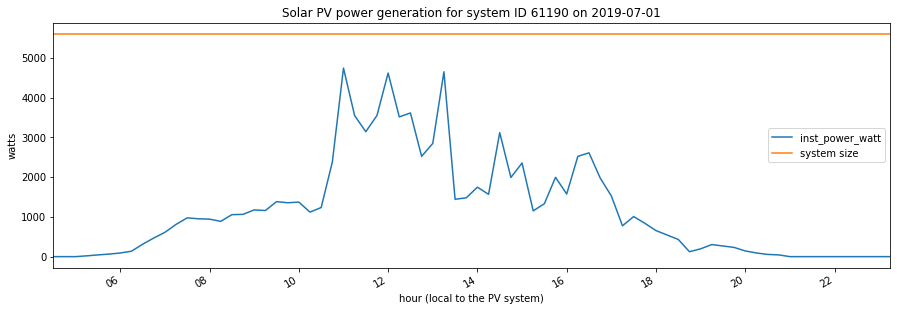

In [10]:
# Plot Solar PV power output for 2019-07-01
ax = status['inst_power_watt'].plot(figsize=(15, 5))
ax.set_xlabel('hour (local to the PV system)')
ax.set_ylabel('watts')
ax.set_title('Solar PV power generation for system ID {} on {}'.format(pv_system_id, DATE))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H', tz=status.index.tz))

# Plot the system size
system_size = metadata['system_size_watts']
ax.plot(ax.get_xlim(), (system_size, system_size), label='system size')

ax.legend();